In [1]:
import skimage.io
import skimage.measure
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
painting_rgb = skimage.io.imread('siciliy.jpg')
painting_luv = skimage.color.rgb2luv(painting_rgb)
painting = np.dstack([painting_rgb, painting_luv])

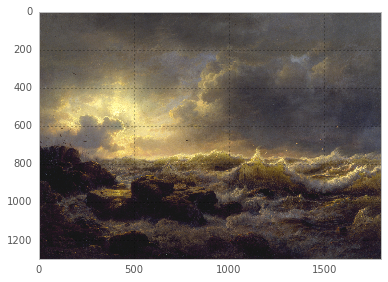

In [3]:
skimage.io.imshow(painting_rgb)

In [4]:
histograms = {}
for i, color in enumerate('rgbluv'):
    histograms[color] = skimage.exposure.histogram(painting[...,i])
    

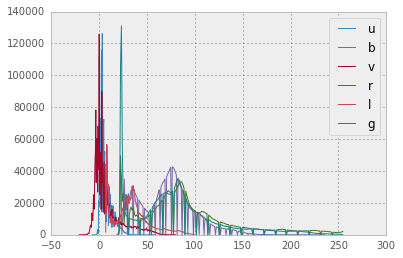

In [5]:
for color in histograms:
    values, bins = histograms[color]
    plt.plot(bins, values, label=color)
plt.legend()

In [59]:
painting_luv_flat = painting_luv.reshape(np.prod(painting_luv.shape[:2]), painting_luv.shape[2])

In [71]:
result = np.histogramdd(painting_luv_flat, bins=100)


In [81]:
values, bins = result
values/=np.prod(painting_rgb.shape[:2])

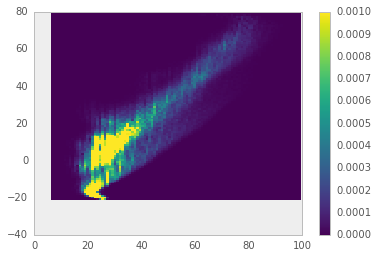

In [91]:

plt.pcolormesh(
    bins[0],
    bins[2],
    values.sum(axis=1), 
    cmap='viridis',
    vmax=0.001
)
plt.colorbar()

In [87]:
len(bins)



3